In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.tools.plotting import parallel_coordinates

import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False
# rcParams['figure.figsize'] = 12, 4
from scipy import stats
import math


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

from sklearn import preprocessing

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 获取训练集和测试集

In [2]:
#训练集1
dataForCNN = pd.read_excel('dataForCNN_17.11.14.xlsx')

dataForCNN.loc[dataForCNN[9]==345,9]='方式1'
dataForCNN.loc[dataForCNN[9]==45,9]='方式2'
dataForCNN.loc[dataForCNN[9]==456,9]='方式3'
dataForCNN.loc[dataForCNN[9]==3456,9]='方式4'
dataForCNN.loc[dataForCNN[9]==16,9]='方式5'
dataForCNN.loc[dataForCNN[9]==34,9]='方式6'
dataForCNN.loc[dataForCNN[9]==56,9]='方式7'
dataForCNN.loc[dataForCNN[9]==356,9]='方式8'

dataForCNN.loc[dataForCNN[23]==345,23]='方式1'
dataForCNN.loc[dataForCNN[23]==45,23]='方式2'
dataForCNN.loc[dataForCNN[23]==456,23]='方式3'
dataForCNN.loc[dataForCNN[23]==3456,23]='方式4'
dataForCNN.loc[dataForCNN[23]==16,23]='方式5'
dataForCNN.loc[dataForCNN[23]==34,23]='方式6'
dataForCNN.loc[dataForCNN[23]==56,23]='方式7'
dataForCNN.loc[dataForCNN[23]==356,23]='方式8'

dataForCNN.loc[dataForCNN[37]==345,37]='方式1'
dataForCNN.loc[dataForCNN[37]==45,37]='方式2'
dataForCNN.loc[dataForCNN[37]==456,37]='方式3'
dataForCNN.loc[dataForCNN[37]==3456,37]='方式4'
dataForCNN.loc[dataForCNN[37]==16,37]='方式5'
dataForCNN.loc[dataForCNN[37]==34,37]='方式6'
dataForCNN.loc[dataForCNN[37]==56,37]='方式7'
dataForCNN.loc[dataForCNN[37]==356,37]='方式8'

# dataForCNN.drop([44],axis=1,inplace=True)#删除事故类型
# dataForCNN.drop([1],axis=1,inplace=True)#删除路号

dataForCNN_toNum = pd.DataFrame()
for i in dataForCNN.columns:
#     print(i)
    dataForCNN_toNum[i] = preprocessing.LabelEncoder().fit_transform(dataForCNN[i])

#训练集2
data_roadGrade_withoutJianyi = pd.read_excel('data_roadGrade_withoutJianyi_17.11.15.xlsx')

data_roadGrade_withoutJianyi.drop(['事故地点','公里数','所辖乡镇'],axis=1,inplace=True)
#删除星期
data_roadGrade_withoutJianyi.drop(['星期'],axis=1,inplace=True)
data_roadGrade_withoutJianyi.drop(['路号','行政区划'],axis=1,inplace=True)
#交通信号方式（控制）
# sns.countplot(data_roadGrade_withoutJianyi['交通信号方式（控制）'])
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==345,'交通信号方式（控制）']='方式1'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==45,'交通信号方式（控制）']='方式2'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==456,'交通信号方式（控制）']='方式3'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==3456,'交通信号方式（控制）']='方式4'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==16,'交通信号方式（控制）']='方式5'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==34,'交通信号方式（控制）']='方式6'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==56,'交通信号方式（控制）']='方式7'
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==356,'交通信号方式（控制）']='方式8'

# sns.countplot(data_roadGrade_withoutJianyi['交通信号方式（控制）'])

#转换为数字
data_roadGrade_withoutJianyi_toNum = pd.DataFrame()
data_roadGrade_withoutJianyi_toNum['路宽'] = data_roadGrade_withoutJianyi['路宽']
for i in [x for x in data_roadGrade_withoutJianyi.columns if x not in ['路宽']]:
        data_roadGrade_withoutJianyi_toNum[i] = \
                preprocessing.LabelEncoder().fit_transform(data_roadGrade_withoutJianyi[i])
data_roadGrade_withoutJianyi_toNum['index'] = range(len(data_roadGrade_withoutJianyi_toNum))

In [3]:
data_roadGrade_withoutJianyi_toNum.columns

Index(['路宽', '中央隔离设施', '是否节假日', '是否白天', '是否双道', '事故多发点段', '事故类型', '交通信号方式（控制）',
       '交通标志标线完善', '其他交通安全设施不全', '在道路横断面位置', '地形', '天气', '是否运载危险物品', '照明条件',
       '能见度', '路侧防护设施类型', '路口路段类型', '路表情况', '路面状况', '路面结构', '道路安全属性',
       '道路安全隐患督办等级', '道路物理隔离', '道路类型', '道路线型', '长下坡路段', 'index'],
      dtype='object')

In [4]:
dataForCNNAndXG_toNum = pd.merge(left=dataForCNN_toNum,right=data_roadGrade_withoutJianyi_toNum,\
                           left_on=[0],right_on=['index'],how='inner')
dataForCNNAndXG_toNum.drop(['index'],axis=1,inplace=True)#删除编号，不删除‘0’列，后面要用
# del data_roadGrade_withoutJianyi_toNum,dataForCNN_toNum

In [5]:
#生成训练集和测试集
dataForCNNAndXG_test = dataForCNNAndXG_toNum.sample(frac=0.1,replace=False)
# #获取训练集
index = ~dataForCNNAndXG_toNum[0].isin(dataForCNNAndXG_test[0])
dataForCNNAndXG_train = dataForCNNAndXG_toNum[index]

#统一训练集、测试集格式
train_features = [x for x in dataForCNNAndXG_toNum.columns if x not in ['事故类型',0]]

x_all =np.array(dataForCNNAndXG_toNum.drop(['事故类型',0],axis=1)) 
y_all = np.array(dataForCNNAndXG_toNum['事故类型'])
y = np.zeros((len(y_all),len(dataForCNNAndXG_toNum.groupby('事故类型')) ))
for i in range(len(y_all)):
    y[i][y_all[i]] = 1
y_all = np.mat(y)
x_all = np.mat(x_all)

x_train =np.array(dataForCNNAndXG_train.drop(['事故类型',0],axis=1)) 
y_train = np.array(dataForCNNAndXG_train['事故类型'])
y = np.zeros((len(y_train),len(dataForCNNAndXG_train.groupby('事故类型')) ))
for i in range(len(y_train)):
    y[i][y_train[i]] = 1
y_train = np.mat(y)
x_train = np.mat(x_train)


x_test =np.array(dataForCNNAndXG_test.drop(['事故类型',0],axis=1)) 
y_test = np.array(dataForCNNAndXG_test['事故类型'])
y = np.zeros((len(y_test),len(dataForCNNAndXG_test.groupby('事故类型')) ))
for i in range(len(y_test)):
    y[i][y_test[i]] = 1
y_test = np.mat(y)
x_test = np.mat(x_test)

# 训练CNN模型

In [15]:
from __future__ import print_function
import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data

In [16]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 42])   # 14x3
ys = tf.placeholder(tf.float32, [None, 3])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 14, 3, 1])
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5, 1,42]) # patch 5x5, in size 1, out size 42
b_conv1 = bias_variable([42])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 14x3x42
h_pool1 = max_pool_2x2(h_conv1)      # output size 7x2x42

## conv2 layer ##
W_conv2 = weight_variable([5,5, 42, 84]) # patch 5x5, in size 42, out size 84
b_conv2 = bias_variable([84])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 7x2x84
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 4x1x84


## fc1 layer ##
W_fc1 = weight_variable([4*1*84, 336])   #注意此处特征值数量是否出现问题
b_fc1 = bias_variable([336])
h_pool2_flat = tf.reshape(h_pool2, [-1, 336])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([336, 20])   #注意此处特征值数量是否出现问题
b_fc2 = bias_variable([20])
h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

## fc3 layer ##
W_fc3 = weight_variable([20, 3])
b_fc3 = bias_variable([3])
prediction = tf.nn.softmax(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(0.0003).minimize(cross_entropy)


In [17]:
sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)
comAuc = 0
for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_train[:,:42], ys: y_train, keep_prob: 0.5})
    if i % 50 == 0:
        if comAuc < compute_accuracy( x_train[:,:42], y_train):
            comAuc = compute_accuracy( x_train[:,:42], y_train)
#             feaFromCNN = sess.run(
#                     tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(
#                     tf.nn.max_pool(tf.nn.relu(\
#                         tf.nn.conv2d(tf.reshape(tf.cast(x_train[:,:42],tf.float32),[-1, 14, 3, 1]), W_conv1,\
#                         strides=[1, 1, 1, 1], padding='SAME'  )+ b_conv1),\
#                         ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME'),W_conv2,\
#                         strides=[1, 1, 1, 1], padding='SAME'  )+ b_conv2),\
#                         ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME'))
            feaFromCNN = sess.run(
                    tf.nn.dropout(tf.nn.softmax(tf.matmul(
                    tf.nn.dropout(tf.nn.relu(tf.matmul(\
                    tf.reshape(tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(
                    tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(\
                        tf.reshape(tf.cast(x_train[:,:42],tf.float32),[-1, 14, 3, 1]), W_conv1,\
                        strides=[1, 1, 1, 1], padding='SAME'  )+ b_conv1),\
                        ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME'),W_conv2,\
                        strides=[1, 1, 1, 1], padding='SAME'  )+ b_conv2),\
                        ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME'),[-1,336]), W_fc1)+ b_fc1)
                        , 0.5), W_fc2) + b_fc2), 0.7))
        print('训练集准确度：%s'%compute_accuracy( x_train[:,:42], y_train))
#         print('测试集准确度：%s'%compute_accuracy( x_test[:,:42], y_test))

训练集准确度：0.492109
训练集准确度：0.494978
训练集准确度：0.592539
训练集准确度：0.61406
训练集准确度：0.648494
训练集准确度：0.6901
训练集准确度：0.750359
训练集准确度：0.777618
训练集准确度：0.810617
训练集准确度：0.857963
训练集准确度：0.898135
训练集准确度：0.911047
训练集准确度：0.908178
训练集准确度：0.926829
训练集准确度：0.934003
训练集准确度：0.926829
训练集准确度：0.931133
训练集准确度：0.944046
训练集准确度：0.942611
训练集准确度：0.945481


# Box-cox变换

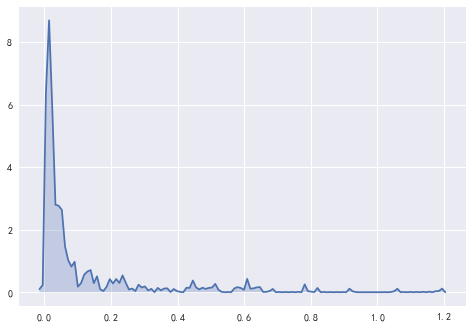

In [35]:
sns.kdeplot(feaFromCNN[:,17],shade=True)

# 对 x_train[:,42:] 作 box-cox变换

In [40]:
from scipy import stats

In [36]:
feaFromOri = pd.DataFrame(x_train[:,42:])
feaFromOri.columns = dataForCNNAndXG_train.drop(['事故类型',0],axis=1).columns[42:]#设置原始数据列名
# print(len(feaFromOri.columns))

D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


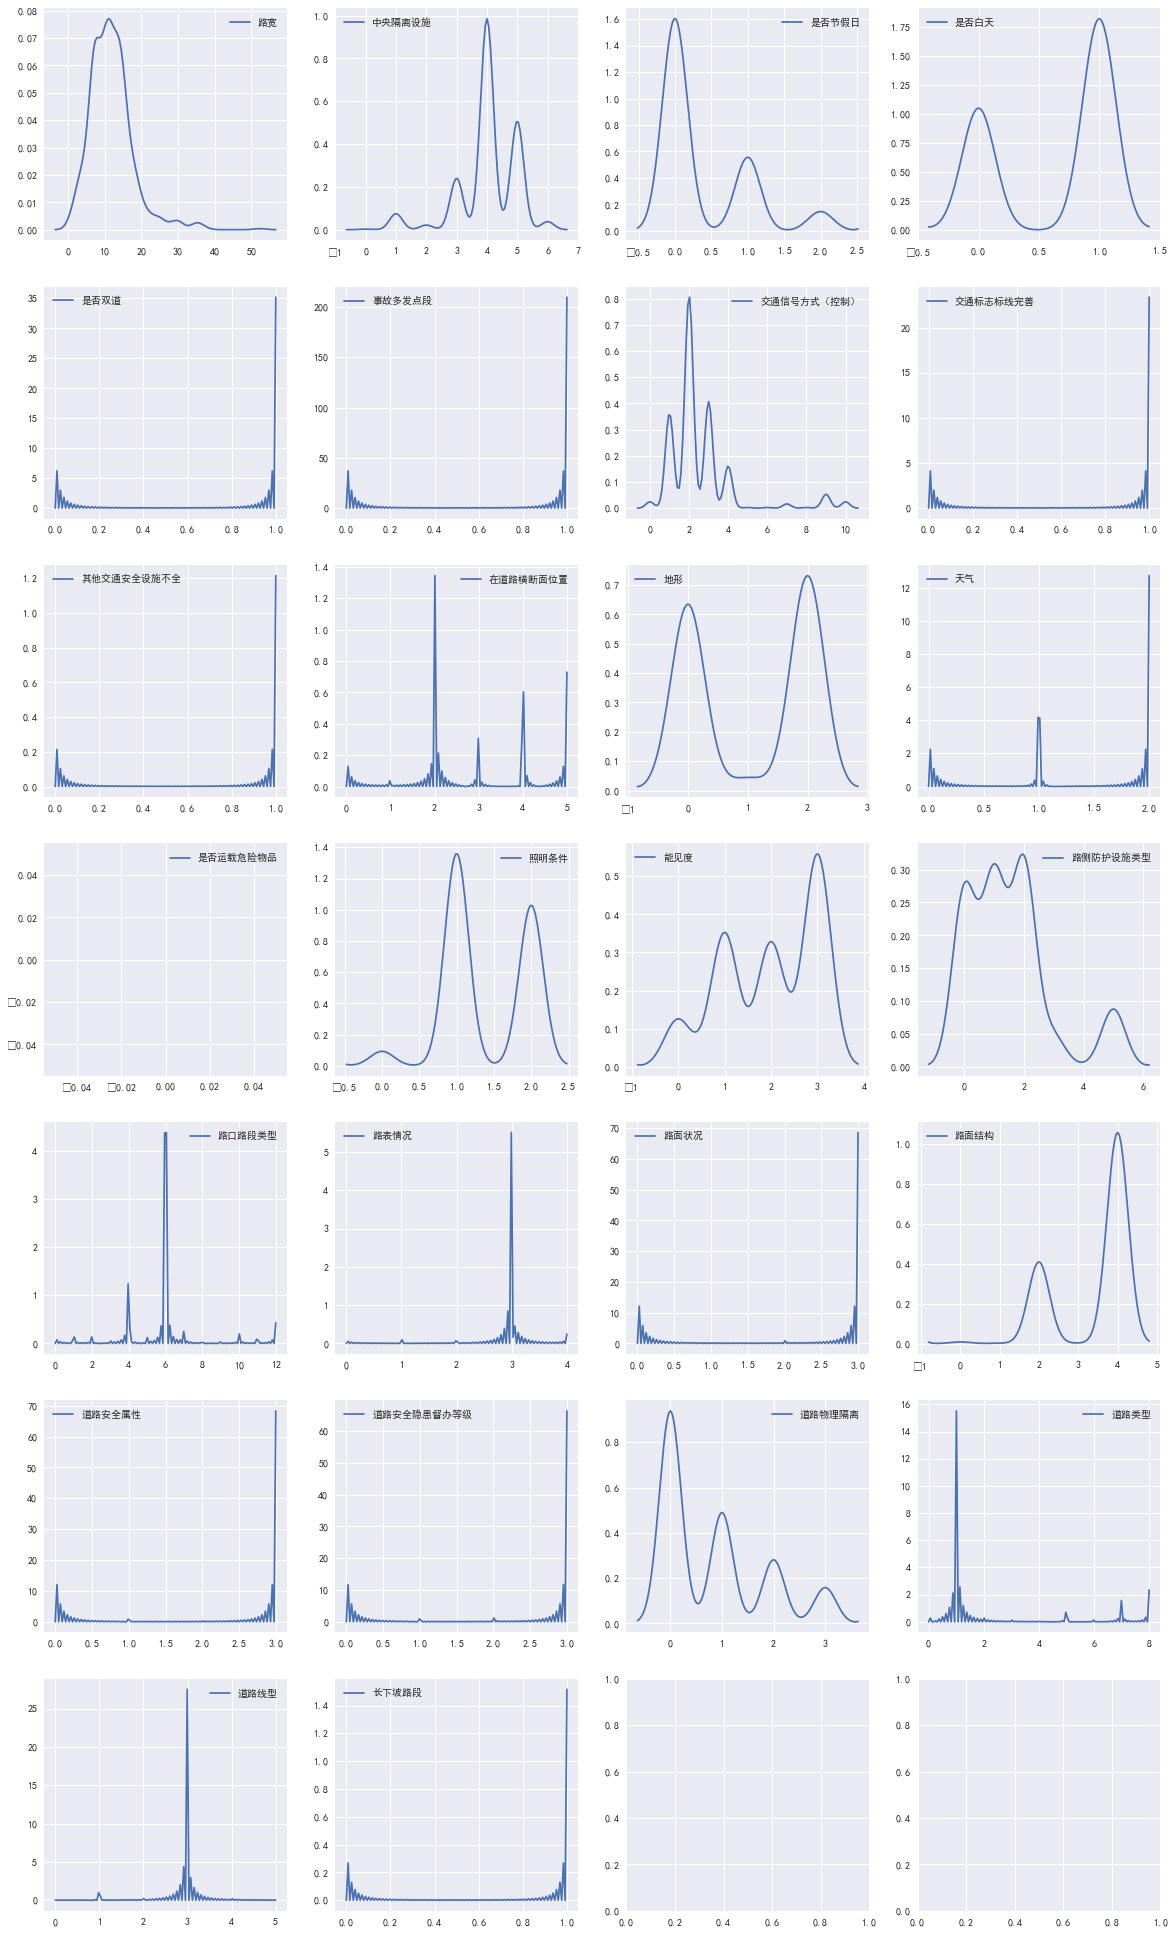

In [39]:
fig2, axes = plt.subplots(7,4,figsize=(20,35))
x=0
y=0
for i in feaFromOri.columns:
    sns.kdeplot(feaFromOri[i],ax=axes[x,y])
    y+=1
    if y==4:
        y=0
        x+=1

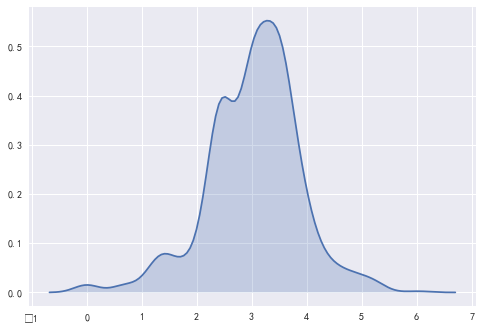

In [56]:
rl = stats.boxcox(feaFromOri['路宽'],lmbda=0.2)
sns.kdeplot(rl,shade=True)

# 训练XGBoost模型

In [9]:
#需要反向传递，暂时不知如何搞定
#加入xgboost
target = '事故类型'
# feaFromCNN_df = np.reshape(feaFromCNN,[feaFromCNN.shape[0],336])
feaFromCNN_df = pd.DataFrame(feaFromCNN)
feaFromCNN_df['index'] = range(len(feaFromCNN_df))
feaFromOri = pd.DataFrame(x_train[:,42:])
feaFromOri.columns = dataForCNNAndXG_train.drop(['事故类型',0],axis=1).columns[42:]#设置原始数据列名
feaFromOri['index'] = range(len(feaFromOri))
feaFromOri = pd.merge(left=feaFromCNN_df,right=feaFromOri,on=['index'],how='inner')
feaFromOri.drop(['index'],axis=1,inplace=True)


Model Report
Accuracy : 0.9914
Accuracy : 0.9137
test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:
test-merror-mean     0.086331
test-merror-std      0.026531
train-merror-mean    0.007914
train-merror-std     0.003336
Name: 63, dtype: float64
5             101
7             100
9              93
0              91
3              91
11             81
14             78
4              75
8              73
15             69
16             69
6              68
12             64
2              62
1              57
路宽             55
10             52
18             47
17             46
19             43
13             37
能见度            17
是否白天           11
照明条件            7
路侧防护设施类型        6
中央隔离设施          6
地形              6
路表情况            4
是否节假日           4
道路物理隔离          4
是否双道            4
道路类型            3
交通信号方式（控制）      2
天气              2
道路线型            2
路口路段类型          1
路面状况            1
交通标志标线完善        1
dtype: int64
<class 'pandas.core.series.Series'>


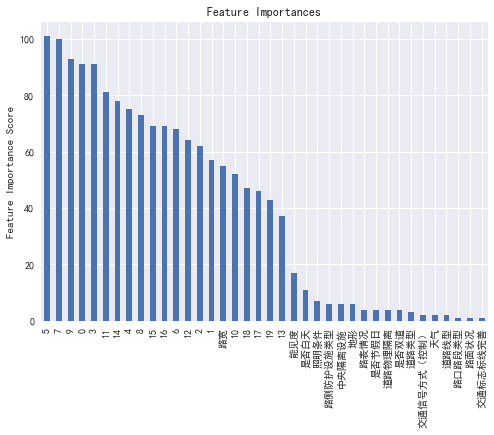

In [9]:
def modelfit(alg, dtrain, dLabel,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):  
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain.values, label=dLabel.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)#, show_progress=False，多分类metrics使用merror
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain,dLabel,eval_metric='merror')    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        



    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dLabel.values, dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))

    cvresult = pd.DataFrame(cvresult)
    print("Accuracy : %.4g" % (1-cvresult.iloc[-1][0]))
    print('test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:')
    print(cvresult.iloc[-1][:])#
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    print(feat_imp)
    print(type(feat_imp))
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

    return alg
    
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.6,
    colsample_bytree=0.7,
    #  reg_alpha=0.005,
    objective= 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
alg = modelfit(xgb1, feaFromOri, dataForCNNAndXG_train['事故类型'])

# 调参

In [29]:
param_test1 = {
 'max_depth':list(range(3,15,2)),
 'min_child_weight':list(range(1,15,2))
}
# learning_rate =0.1,
#     n_estimators=1000,
#     max_depth=4,
#     min_child_weight=0,
#     gamma=0,
#     subsample=0.6,
#     colsample_bytree=0.7,
#     #  reg_alpha=0.005,
#     objective= 'multi:softmax',
#     nthread=4,
#     scale_pos_weight=1,
#     seed=27
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0.005,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_log_loss',n_jobs=4,iid=False, cv=5)

gsearch1.fit(feaFromOri, dataForCNNAndXG_train['事故类型'])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

#{'max_depth': 9, 'min_child_weight': 2},
 #0.6770666217228164)

([mean: -0.26488, std: 0.04431, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: -0.26477, std: 0.04842, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: -0.26393, std: 0.04620, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: -0.27495, std: 0.04477, params: {'max_depth': 3, 'min_child_weight': 7},
  mean: -0.28297, std: 0.04263, params: {'max_depth': 3, 'min_child_weight': 9},
  mean: -0.28692, std: 0.04112, params: {'max_depth': 3, 'min_child_weight': 11},
  mean: -0.29129, std: 0.04147, params: {'max_depth': 3, 'min_child_weight': 13},
  mean: -0.27331, std: 0.05593, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: -0.26592, std: 0.04679, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: -0.26378, std: 0.04467, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.27290, std: 0.04246, params: {'max_depth': 5, 'min_child_weight': 7},
  mean: -0.27630, std: 0.04044, params: {'max_depth': 5, 'min_child_weight': 9},
  mean: -0.28470, std: 0.0

In [30]:
param_test1b = {
 'max_depth':list(range(8,14,1)),
 'min_child_weight':list(range(1,5,1))
}
# learning_rate =0.1,
#     n_estimators=1000,
#     max_depth=4,
#     min_child_weight=0,
#     gamma=0,
#     subsample=0.6,
#     colsample_bytree=0.7,
#     #  reg_alpha=0.005,
#     objective= 'multi:softmax',
#     nthread=4,
#     scale_pos_weight=1,
#     seed=27
gsearch1b = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,reg_alpha=0.005,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1b, scoring='neg_log_loss',n_jobs=4,iid=False, cv=5)

gsearch1b.fit(feaFromOri, dataForCNNAndXG_train['事故类型'])
gsearch1b.grid_scores_, gsearch1b.best_params_, gsearch1b.best_score_

#{'max_depth': 9, 'min_child_weight': 2},
 #0.6770666217228164)

([mean: -0.27029, std: 0.05082, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: -0.26341, std: 0.04163, params: {'max_depth': 8, 'min_child_weight': 2},
  mean: -0.25817, std: 0.04251, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: -0.26391, std: 0.04533, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: -0.26679, std: 0.05039, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -0.26367, std: 0.04288, params: {'max_depth': 9, 'min_child_weight': 2},
  mean: -0.26143, std: 0.04147, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: -0.26461, std: 0.04723, params: {'max_depth': 9, 'min_child_weight': 4},
  mean: -0.26963, std: 0.05104, params: {'max_depth': 10, 'min_child_weight': 1},
  mean: -0.26279, std: 0.04227, params: {'max_depth': 10, 'min_child_weight': 2},
  mean: -0.26049, std: 0.04345, params: {'max_depth': 10, 'min_child_weight': 3},
  mean: -0.26553, std: 0.04515, params: {'max_depth': 10, 'min_child_weight': 4},
  mean: -0.26719, std: 0

{'max_depth': 8, 'min_child_weight': 3},
 -0.25817187855117213)

In [31]:
#gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, \
                                                  max_depth=8,min_child_weight=3, gamma=0, subsample=0.8, \
                                                  colsample_bytree=0.8,reg_alpha=0.005,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='neg_log_loss',n_jobs=4,iid=False, cv=5)

gsearch2.fit(feaFromOri, dataForCNNAndXG_train['事故类型'])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


([mean: -0.25817, std: 0.04251, params: {'gamma': 0.0},
  mean: -0.26126, std: 0.04462, params: {'gamma': 0.1},
  mean: -0.26064, std: 0.04078, params: {'gamma': 0.2},
  mean: -0.25753, std: 0.03997, params: {'gamma': 0.3},
  mean: -0.25818, std: 0.03834, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 -0.2575304973078466)

{'gamma': 0.3},
 -0.2164761176817976)


Model Report
Accuracy : 0.9957
Accuracy : 0.9036
test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:
test-merror-mean     0.096403
test-merror-std      0.043548
train-merror-mean    0.003597
train-merror-std     0.001137
Name: 99, dtype: float64


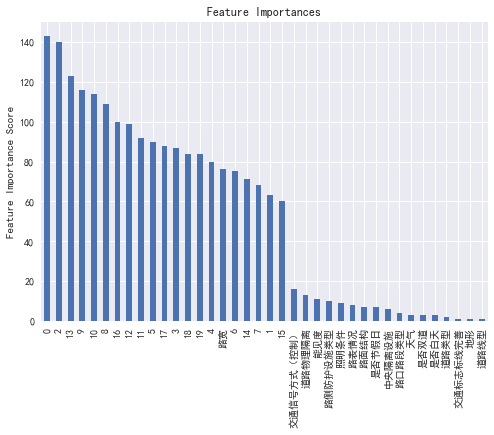

In [33]:
def modelfit(alg, dtrain, dLabel,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):  
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain.values, label=dLabel.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)#, show_progress=False，多分类metrics使用merror
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain,dLabel,eval_metric='merror')    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        



    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dLabel.values, dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))

    cvresult = pd.DataFrame(cvresult)
    print("Accuracy : %.4g" % (1-cvresult.iloc[-1][0]))
    print('test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:')
    print(cvresult.iloc[-1][:])#
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

    return alg
    
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=100,
    max_depth=8,
    min_child_weight=3,
    gamma=0.3,
    subsample=0.6,
    colsample_bytree=0.7,
    #  reg_alpha=0.005,
    objective= 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
alg = modelfit(xgb1, feaFromOri, dataForCNNAndXG_train['事故类型'])

In [34]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=3, gamma=0.3, subsample=0.8, colsample_bytree=0.8,reg_alpha=0.005,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='neg_log_loss',n_jobs=4,iid=False, cv=5)

gsearch3.fit(feaFromOri, dataForCNNAndXG_train['事故类型'])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -0.26254, std: 0.04810, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: -0.25179, std: 0.04199, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: -0.25768, std: 0.04481, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: -0.25885, std: 0.04598, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: -0.26252, std: 0.05026, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: -0.25444, std: 0.03600, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: -0.25404, std: 0.03763, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: -0.25433, std: 0.03820, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: -0.26391, std: 0.05048, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: -0.26037, std: 0.04320, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: -0.25753, std: 0.03997, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: -0.25938, std: 0.04062, params: {'colsample_bytree': 0.8,

In [35]:
param_test4 = {
 'subsample':[i/100.0 for i in range(50,70,5)],
 'colsample_bytree':[i/100.0 for i in range(70,80,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=3, gamma=0.3, subsample=0.8, colsample_bytree=0.8,reg_alpha=0.005,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='neg_log_loss',n_jobs=4,iid=False, cv=5)

gsearch4.fit(feaFromOri, dataForCNNAndXG_train['事故类型'])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: -0.25955, std: 0.04256, params: {'colsample_bytree': 0.7, 'subsample': 0.5},
  mean: -0.26515, std: 0.04690, params: {'colsample_bytree': 0.7, 'subsample': 0.55},
  mean: -0.26252, std: 0.05026, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: -0.25725, std: 0.04865, params: {'colsample_bytree': 0.7, 'subsample': 0.65},
  mean: -0.26239, std: 0.05124, params: {'colsample_bytree': 0.75, 'subsample': 0.5},
  mean: -0.26365, std: 0.04728, params: {'colsample_bytree': 0.75, 'subsample': 0.55},
  mean: -0.25862, std: 0.05000, params: {'colsample_bytree': 0.75, 'subsample': 0.6},
  mean: -0.25334, std: 0.04621, params: {'colsample_bytree': 0.75, 'subsample': 0.65}],
 {'colsample_bytree': 0.75, 'subsample': 0.65},
 -0.2533406440992486)


Model Report
Accuracy : 1
Accuracy : 0.9137
test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:
test-merror-mean     0.086331
test-merror-std      0.041202
train-merror-mean    0.000720
train-merror-std     0.000881
Name: 175, dtype: float64


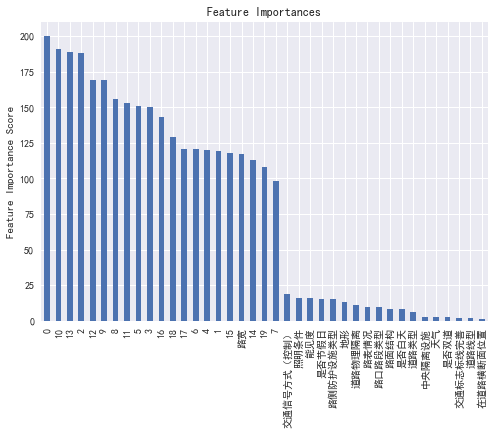

In [38]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=8,
    min_child_weight=3,
    gamma=0,
    colsample_bytree=0.75,
    subsample=0.65,
    #  reg_alpha=0.005,
    objective= 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
alg = modelfit(xgb1, feaFromOri, dataForCNNAndXG_train['事故类型'])

{'colsample_bytree': 0.75, 'subsample': 0.65},
 -0.23463019253827033)

In [40]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=3, gamma=0, colsample_bytree=0.75,subsample=0.65,reg_alpha=0.005,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='neg_log_loss',n_jobs=4,iid=False, cv=5)

gsearch5.fit(feaFromOri, dataForCNNAndXG_train['事故类型'])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: -0.25738, std: 0.05199, params: {'reg_alpha': 1e-05},
  mean: -0.25946, std: 0.05089, params: {'reg_alpha': 0.01},
  mean: -0.25794, std: 0.05507, params: {'reg_alpha': 0.1},
  mean: -0.25547, std: 0.04129, params: {'reg_alpha': 1},
  mean: -1.05574, std: 0.00427, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 -0.2554749808257945)

In [42]:
param_test5b = {
 'reg_alpha':[0, 0.1, 0.5, 1, 5,10]
}
gsearch5b = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=3, gamma=0, colsample_bytree=0.75,subsample=0.65,reg_alpha=0.005,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5b, scoring='neg_log_loss',n_jobs=4,iid=False, cv=5)

gsearch5b.fit(feaFromOri, dataForCNNAndXG_train['事故类型'])
gsearch5b.grid_scores_, gsearch5b.best_params_, gsearch5b.best_score_

([mean: -0.25711, std: 0.05225, params: {'reg_alpha': 0},
  mean: -0.25794, std: 0.05507, params: {'reg_alpha': 0.1},
  mean: -0.25497, std: 0.04842, params: {'reg_alpha': 0.5},
  mean: -0.25547, std: 0.04129, params: {'reg_alpha': 1},
  mean: -0.29277, std: 0.02666, params: {'reg_alpha': 5},
  mean: -0.36777, std: 0.01823, params: {'reg_alpha': 10}],
 {'reg_alpha': 0.5},
 -0.25496553354895346)


Model Report
Accuracy : 1
Accuracy : 0.9151
test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:
test-merror-mean     0.084892
test-merror-std      0.038982
train-merror-mean    0.000360
train-merror-std     0.000720
Name: 191, dtype: float64


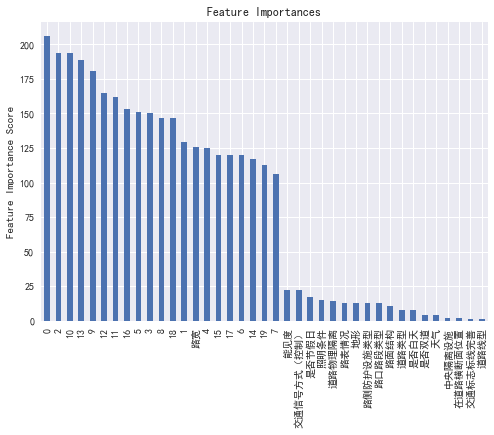

In [54]:
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=250,
    max_depth=8,
    min_child_weight=3,
    gamma=0,
    colsample_bytree=0.75,subsample=0.65,reg_alpha=0.05,
    objective= 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
alg = modelfit(xgb1, feaFromOri, dataForCNNAndXG_train['事故类型'])


Model Report
Accuracy : 1
Accuracy : 0.9151
test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:
test-merror-mean     0.084892
test-merror-std      0.038982
train-merror-mean    0.000360
train-merror-std     0.000720
Name: 191, dtype: float64


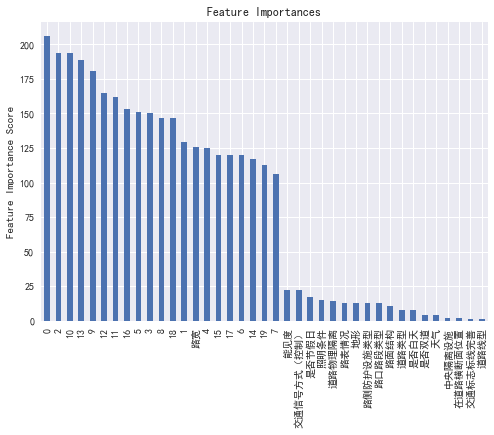

In [55]:
def modelfit(alg, dtrain, dLabel,useTrainCV=True, cv_folds=5, early_stopping_rounds=50): 
    global feat_imp
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain.values, label=dLabel.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)#, show_progress=False，多分类metrics使用merror
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain,dLabel,eval_metric='merror')    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        



    print ("\nModel Report")
    print ("Accuracy on trainSet : %.4g" % metrics.accuracy_score(dLabel.values, dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))

    cvresult = pd.DataFrame(cvresult)
    print("Accuracy on cv set : %.4g" % (1-cvresult.iloc[-1][0]))
    print('test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:')
    print(cvresult.iloc[-1][:])#
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

    return alg
    
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=250,
    max_depth=8,
    min_child_weight=3,
    gamma=0,
    colsample_bytree=0.75,subsample=0.65,reg_alpha=0.05,
    objective= 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
alg = modelfit(xgb1, feaFromOri, dataForCNNAndXG_train['事故类型'])

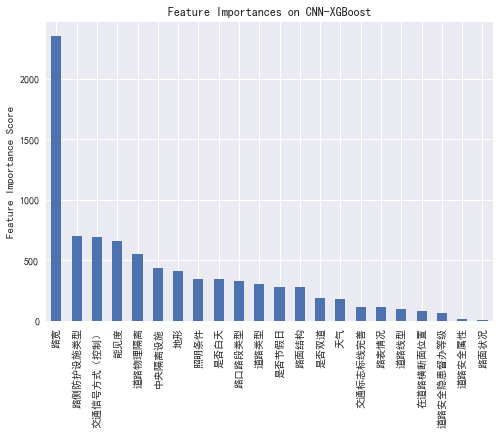

In [88]:
colIsNum = list(range(100))
colIsNumReal = list()
for i in colIsNum:
    colIsNumReal.append(str(i)+'')
del colIsNum


def modelfit(alg, dtrain, dLabel,useTrainCV=True, cv_folds=5, early_stopping_rounds=50): 
    global feat_imp
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain.values, label=dLabel.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)#, show_progress=False，多分类metrics使用merror
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain,dLabel,eval_metric='merror')    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        



#     print ("\nModel Report")
#     print ("Accuracy:  %.4g" % metrics.accuracy_score(dLabel.values, dtrain_predictions))
# #     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))

#     cvresult = pd.DataFrame(cvresult)
#     print("Accuracy on 5-Fold Cross Validation : %.4g" % (1-cvresult.iloc[-1][0]))
#     print('test-auc-mean and test-auc-std and train-auc-mean and train-auc-std:')
#     print(cvresult.iloc[-1][:])#               
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    fe = feat_imp[[x for x in feat_imp.index if x not in colIsNumReal] ]
    fe.plot(kind='bar', title='Feature Importances on CNN-XGBoost')
    plt.ylabel('Feature Importance Score')

    return alg
    
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=250,
    max_depth=8,
    min_child_weight=3,
    gamma=0,
    colsample_bytree=0.75,subsample=0.65,reg_alpha=0.05,
    objective= 'multi:softmax',
    nthread=4,
    scale_pos_weight=1,
    seed=27)
alg = modelfit(xgb1, feaFromOri, dataForCNNAndXG_train['事故类型'])

# 相关性分析

In [2]:
data_roadGrade_withoutJianyi = pd.read_excel('data_roadGrade_withoutJianyi_17.11.15.xlsx')

data_roadGrade_withoutJianyi.drop(['事故地点','公里数','所辖乡镇'],axis=1,inplace=True)
#删除星期
data_roadGrade_withoutJianyi.drop(['星期'],axis=1,inplace=True)
data_roadGrade_withoutJianyi.drop(['路号','行政区划'],axis=1,inplace=True)

In [97]:
#财产损失事故：1    伤人事故：2    死亡事故：3
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['事故类型']=='财产损失事故','事故类型'] = 1
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['事故类型']=='伤人事故','事故类型'] = 2
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['事故类型']=='死亡事故','事故类型'] = 3

data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']=='无信号','交通信号方式（控制）']=10
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==345,'交通信号方式（控制）']=9
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==45,'交通信号方式（控制）']=8
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==456,'交通信号方式（控制）']=7
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==3456,'交通信号方式（控制）']=6
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==16,'交通信号方式（控制）']=5
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==34,'交通信号方式（控制）']=4
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==56,'交通信号方式（控制）']=3
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']==356,'交通信号方式（控制）']=2
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']=='其它安全设施','交通信号方式（控制）']=1
data_roadGrade_withoutJianyi.loc[data_roadGrade_withoutJianyi['交通信号方式（控制）']=='标线','交通信号方式（控制）']=11

# sns.countplot(data_roadGrade_withoutJianyi['事故类型'])

In [128]:
dataForAnalyze = data_roadGrade_withoutJianyi[['路宽','交通信号方式（控制）','能见度','路侧防护设施类型','道路物理隔离','路口路段类型','事故类型']]

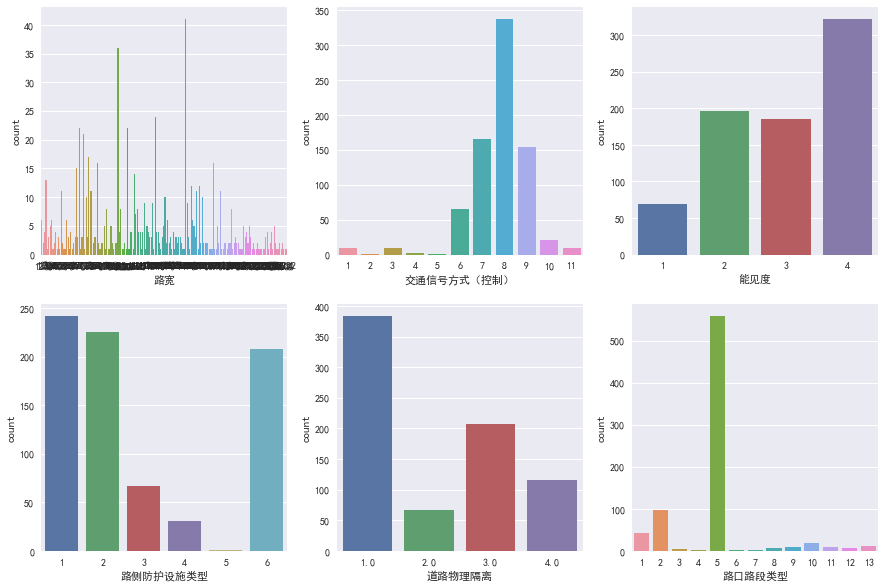

In [132]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
x=0
y=0
for i in [x for x in dataForAnalyze.columns if x not in ['事故类型']]:
    sns.countplot(dataForAnalyze[i],ax=axes[x,y])
    y+=1
    if y==3:
        y=0
        x+=1
        
# for i,j in dataForAnalyze.groupby('路口路段类型'):
#     print(i)

In [130]:
#转化为数字

dataForAnalyze.loc[dataForAnalyze['路侧防护设施类型']=='绿化带','路侧防护设施类型'] = int(1)
dataForAnalyze.loc[dataForAnalyze['路侧防护设施类型']=='混凝土护拦','路侧防护设施类型'] = int(2.0)
dataForAnalyze.loc[dataForAnalyze['路侧防护设施类型']=='防护墩(柱)','路侧防护设施类型'] = int(3.0)
dataForAnalyze.loc[dataForAnalyze['路侧防护设施类型']=='行道树','路侧防护设施类型'] = int(4.0)
dataForAnalyze.loc[dataForAnalyze['路侧防护设施类型']=='金属护拦','路侧防护设施类型'] = int(5.0)
dataForAnalyze.loc[dataForAnalyze['路侧防护设施类型']=='无防护','路侧防护设施类型'] = int(6.0)


dataForAnalyze.loc[dataForAnalyze['道路物理隔离']=='中心隔离','道路物理隔离'] = 1.0
dataForAnalyze.loc[dataForAnalyze['道路物理隔离']=='机非隔离','道路物理隔离'] = 2.0
dataForAnalyze.loc[dataForAnalyze['道路物理隔离']=='中心隔离加机非隔离','道路物理隔离'] = 3.0
dataForAnalyze.loc[dataForAnalyze['道路物理隔离']=='无隔离','道路物理隔离'] = 4.0


dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='三枝分叉口','路口路段类型'] = 1
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='四枝分叉口','路口路段类型'] = 2
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='多枝分叉口','路口路段类型'] = 3
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='环行交叉','路口路段类型'] = 4
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='普通路段','路口路段类型'] = 5
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='变窄路段','路口路段类型'] = 6
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='路侧险要路段','路口路段类型'] = 7
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='匝道口','路口路段类型'] = 8
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='路段进出处','路口路段类型'] = 9
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='高架路段','路口路段类型'] = 10
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='桥梁','路口路段类型'] = 11
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='隧道','路口路段类型'] = 12
dataForAnalyze.loc[dataForAnalyze['路口路段类型']=='其他特殊路段','路口路段类型'] = 13


D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [141]:
dataForAnalyze.to_excel('dataForAnalyze_17.11.21.xlsx')

### 在此读取数据

In [3]:
dataForAnalyze = pd.read_excel('dataForAnalyze_17.11.21.xlsx')

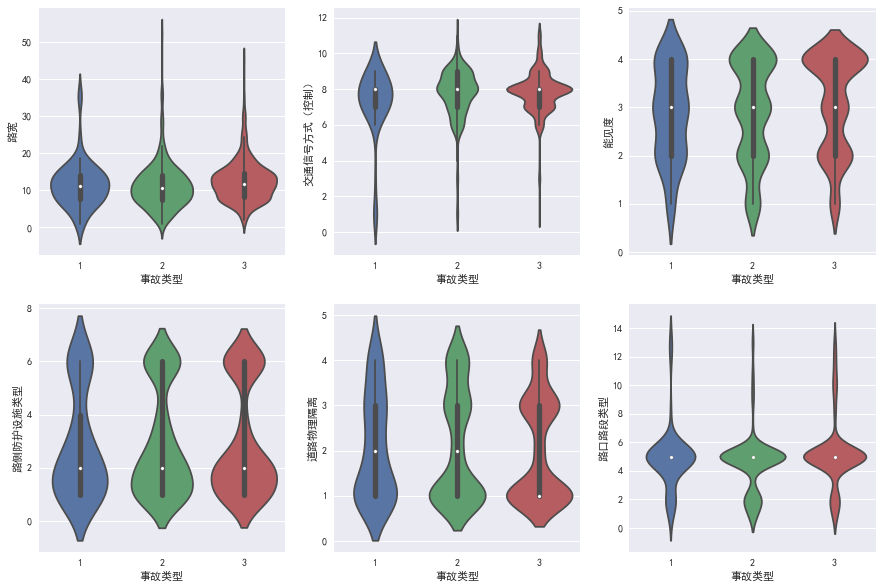

In [144]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
x=0
y=0
for i in [x for x in dataForAnalyze.columns if x not in ['事故类型']]:
    sns.violinplot(x='事故类型',y=i,data=dataForAnalyze,ax=axes[x,y])
    y+=1
    if y==3:
        y=0
        x+=1
        
# for i,j in dataForAnalyze.groupby('路口路段类型'):
#     print(i)

In [145]:
#路宽
# fig,axes = plt.subplots(1,1,figsize=(5,5))
# sns.violinplot(x='事故类型',y='路宽',data=data_roadGrade_withoutJianyi,ax=axes)
# sns.jointplot(x="路宽", y="事故类型", data=data_roadGrade_withoutJianyi[['路宽','事故类型']], kind="kde")#相交的 KDE 图

#### jointplot:pearson_r 和r = 0 的假设检验p值;
#### 如果P<0.01，说明是较强的判定结果，拒绝假定的参数取值。
#### 如果0.01<P值<0.05，说明较弱的判定结果，拒绝假定的参数取值。
#### 如果P值>0.05，说明结果更倾向于接受假定的参数取值

D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
D:\ProgramFiles\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
D:\ProgramFiles\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


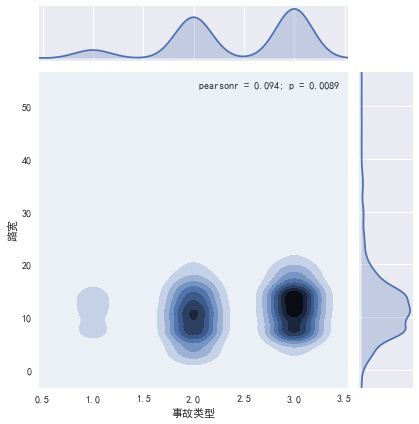

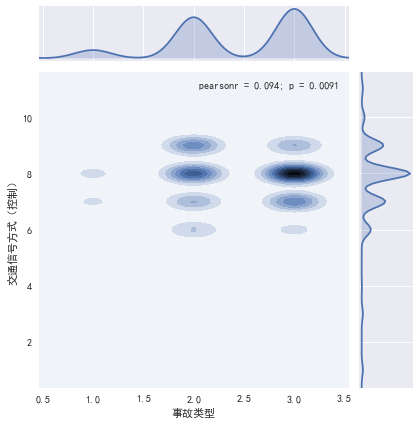

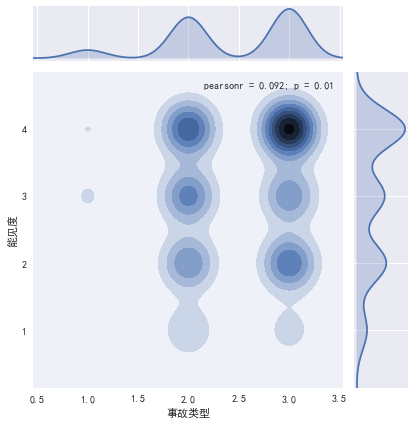

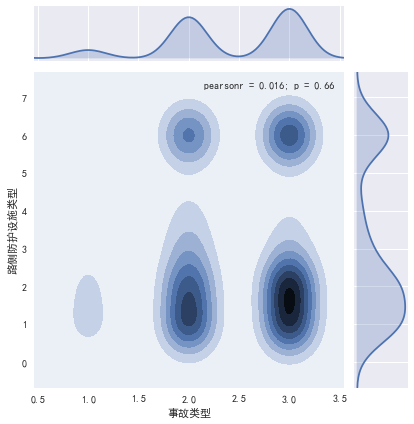

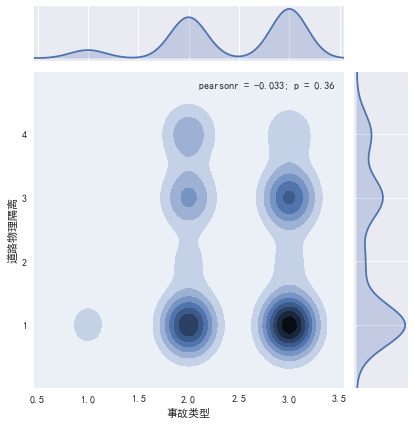

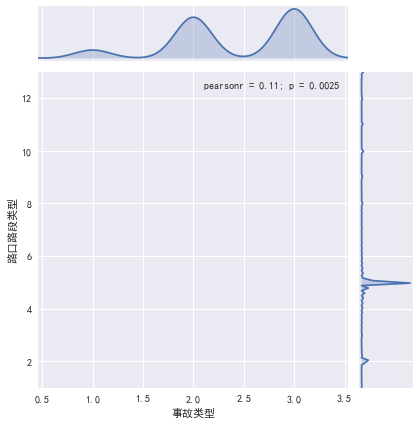

In [146]:
for i in [z for z in dataForAnalyze.columns if z not in ['事故类型','index']]:
    sns.jointplot(x='事故类型',y=i,data=dataForAnalyze,kind='kde')

In [9]:
dataForAnalyze[['交通信号方式（控制）','能见度','路侧防护设施类型', '道路物理隔离', '路口路段类型','事故类型' ]]\
        .to_excel('dataForAnalyzeConcat2_17.11.22.xlsx')

### 合并 dataForAnalyzeConcat1_17.11.22.xlsx and dataForAnalyzeConcat2_17.11.22.xlsx

In [10]:

dataForAnalyzeConcat1 = pd.read_excel('dataForAnalyzeConcat1_17.11.22.xlsx')
dataForAnalyzeConcat2 = pd.read_excel('dataForAnalyzeConcat2_17.11.22.xlsx')
dataForAnalyzeConcat = pd.DataFrame()
dataForAnalyzeConcat = pd.concat([dataForAnalyzeConcat1,dataForAnalyzeConcat2],ignore_index=True)
print(len(dataForAnalyzeConcat))

904


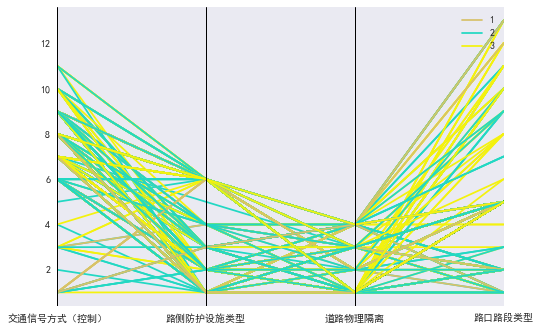

In [14]:
parallel_coordinates(dataForAnalyzeConcat[['交通信号方式（控制）','路侧防护设施类型', '道路物理隔离', '路口路段类型','事故类型' ]],\
                     '事故类型')